In [98]:
#libraries for data analysis part
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for ML part
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


%matplotlib inline

In [99]:
heart_df= pd.read_csv('C:/Users/KIIT/Programs/Projects/Content/heart.csv') #import dataset and read it
heart_df.head()#shows only 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# New Section

In [100]:
heart_df.info()#get all information of data (column name,data type ,missing value,etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [101]:
heart_df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [102]:
heart_df.groupby('target').mean()  #to find avg wrt target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


0-no heart disease

1-heart disease


```
# This is formatted as code
```



In [103]:
heart_df = heart_df.drop(["chol", "fbs","sex"], axis=1)  # Remove "chol" "Sex" and "fbs" columns
heart_df.head()


,age,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,0,125,1,168,0,1.0,2,2,3,0
1,53,0,140,0,155,1,3.1,0,0,3,0
2,70,0,145,1,125,1,2.6,0,0,3,0
3,61,0,148,1,161,0,0.0,2,1,3,0
4,62,0,138,1,106,0,1.9,1,3,2,0


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

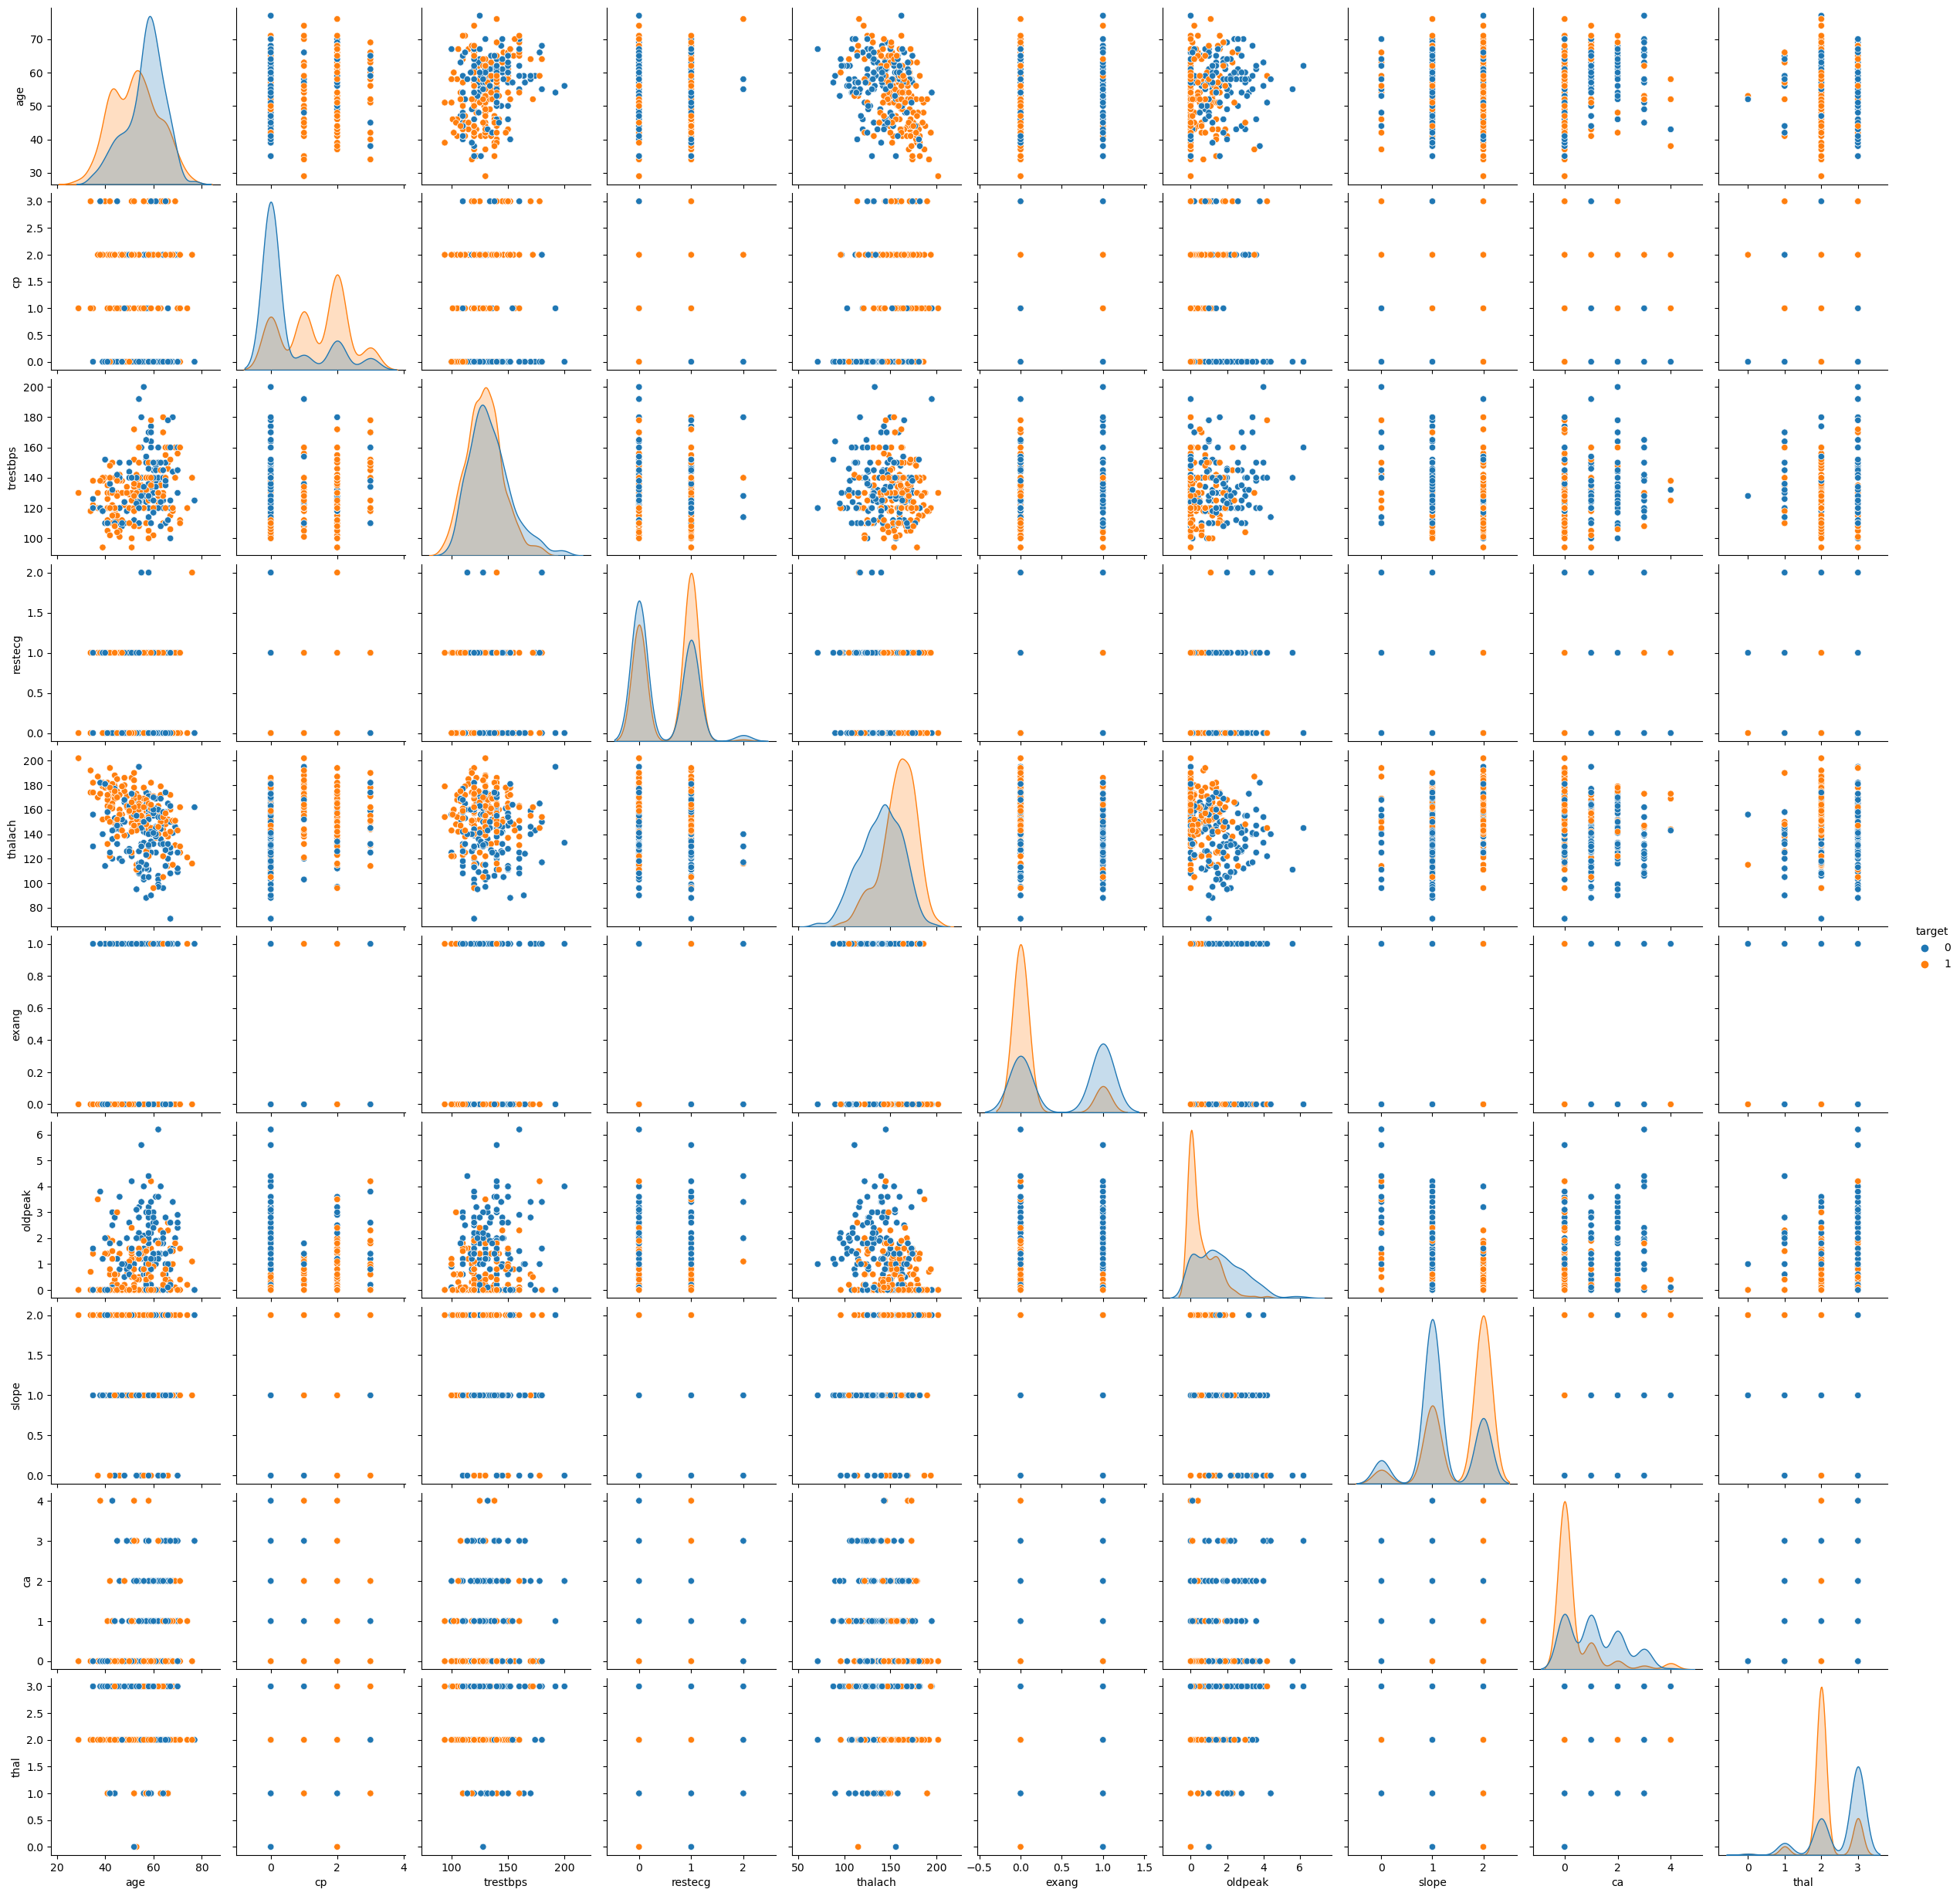

In [104]:
sns.pairplot(heart_df,hue = "target")#vizualize the most determined feature that contribute to the outcome wrt target

In [105]:
corr = heart_df.corr()#correleation function to show correleation to find best dependecy
corr

,age,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.071966,0.271121,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
cp,-0.071966,1.000000,0.038177,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,0.038177,1.000000,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
restecg,-0.132696,0.043581,-0.123794,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,0.306839,-0.039264,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,-0.401513,0.061197,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,-0.174733,0.187434,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441
slope,-0.169105,0.131633,-0.120445,0.086086,0.395308,-0.267335,-0.575189,1.000000,-0.073440,-0.094090,0.345512
ca,0.271551,-0.176206,0.104554,-0.078072,-0.207888,0.107849,0.221816,-0.073440,1.000000,0.149014,-0.382085
thal,0.072297,-0.163341,0.059276,-0.020504,-0.098068,0.197201,0.202672,-0.094090,0.149014,1.000000,-0.337838


<Axes: >

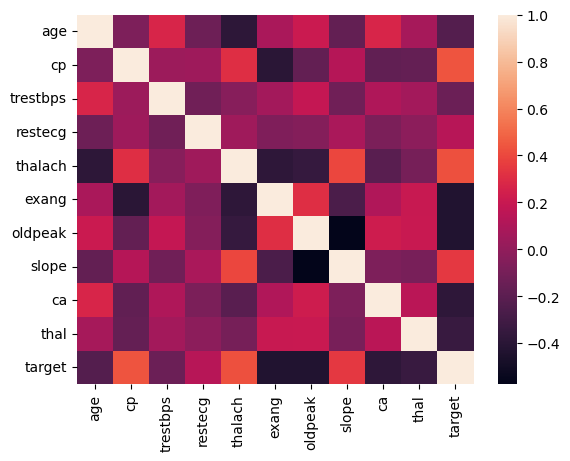

In [106]:
import seaborn as sns
sns.heatmap(corr,)#to vizualize graphically(lighter shade=best co-relation)

In [107]:
x= heart_df.drop(columns= 'target',axis=1)# all fearures
y= heart_df['target']#labels
x.head()

,age,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,0,125,1,168,0,1.0,2,2,3
1,53,0,140,0,155,1,3.1,0,0,3
2,70,0,145,1,125,1,2.6,0,0,3
3,61,0,148,1,161,0,0.0,2,1,3
4,62,0,138,1,106,0,1.9,1,3,2


In [108]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,stratify=y,random_state=2)#y train=20,y test=80,stratify used to distribute evenly )

In [110]:
model_naive = GaussianNB()  #as we use classification model,we use classifier.


In [111]:
model_naive.fit(x_train,y_train)#training the model by giving only train data

GaussianNB()

In [112]:
x_train_prediction = model_naive.predict(x_train)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [113]:
training_data_accuracy

0.8268292682926829

In [114]:
x_train_prediction = model_naive.predict(x_test)#test the accuracy of the training data set
testing_data_accuracy = accuracy_score(x_train_prediction,y_test)

In [115]:
training_data_accuracy

0.8268292682926829

In [116]:
input_data = (58,1,145,0,156,0,0.4,0,0,3)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = model_naive.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You do not have any heart disease.'
else:
    message = 'You have heart disease, Kindly contact a doctor.'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[ 58.    1.  145.    0.  156.    0.    0.4   0.    0.    3. ]
[[ 58.    1.  145.    0.  156.    0.    0.4   0.    0.    3. ]]
[0]
Input Features:  (58, 1, 145, 0, 156, 0, 0.4, 0, 0, 3)
Prediction:  [0]
Prediction Message:  Nothing to worry, You do not have any heart disease.


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [117]:
for column in x.columns:
  print(column)

age
cp
trestbps
restecg
thalach
exang
oldpeak
slope
ca
thal


In [118]:
import pickle #library for app

In [119]:
import os

# Define the path for the directory (replace with your desired directory path)
directory_path = '/path/to/health_data_analysis0'  # Example: '/home/user/my_data_directory'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Check if the directory was created or already exists
if os.path.exists(directory_path):
    print(f"Directory '{directory_path}' has been created or already exists.")
else:
    print(f"Failed to create directory '{directory_path}'.")


Directory '/path/to/health_data_analysis0' has been created or already exists.


In [120]:
filename='heart_model.sav'#give file name

In [121]:
pickle.dump(model_naive,open(filename,'wb'))#save directory

In [122]:
loaded_model = pickle.load(open(filename,'rb'))

In [123]:
input_data = (58,1,145,0,156,0,0.4,0,0,3)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You do not have any heart disease.'
else:
    message = 'You have heart disease, Kindly contact a doctor.'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[ 58.    1.  145.    0.  156.    0.    0.4   0.    0.    3. ]
[[ 58.    1.  145.    0.  156.    0.    0.4   0.    0.    3. ]]
[0]
Input Features:  (58, 1, 145, 0, 156, 0, 0.4, 0, 0, 3)
Prediction:  [0]
Prediction Message:  Nothing to worry, You do not have any heart disease.


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
